In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

<h4>File reading and merging</h4>

In [2]:
df1 = pd.read_csv('7282_1.csv')
df2 = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df3 = pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
old_names = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text', 'reviews.userCity', 
             'reviews.username', 'reviews.userProvince'] 
new_names = ['date', 'rating', 'title', 'text', 'userCity', 'username', 'userProvince']
df.rename(columns = dict(zip(old_names, new_names)), inplace = True)
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,date,...,userProvince,id,dateAdded,dateUpdated,primaryCategories,keys,reviews.dateSeen,reviews.sourceURLs,sourceURLs,websites
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Rockaway Beach,US,45.611260,-123.945560,Silver Sands Oceanfront Motel,97136-9596,OR,2016-03-13T00:00:00Z,...,GA,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,Accommodation & Food Services,us/or/rockawaybeach/215spacificst/-1035432852,2016-03-23T00:00:00Z,http://www.tripadvisor.com/Hotel_Review-g52043...,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,669 Route 6a,"Hotel,Hotels",East Sandwich,US,41.729390,-70.399250,Sandy Neck Motel,02537-1472,MA,2015-12-11T00:00:00Z,...,MA,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/ma/eastsandwich/669route6a/-1480952475,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",https://www.tripadvisor.com/Hotel_Review-g4154...,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Coeur d'Alene,US,47.699930,-116.796900,Shilo Inn Suites - Coeur d'Alene,83814-9338,ID,2017-11-17T00:00:00.000Z,...,UnitedStates,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/id/coeurd'alene/702wapplewayave/210547670,2017-12-17T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g3541...,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Jackson,US,35.666390,-88.830120,Scottish Inn,38305-4922,TN,2016-06-09T00:00:00Z,...,NaN,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,Accommodation & Food Services,us/tn/jackson/2295nhighlandave/1759289930,2016-07-16T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g5512...,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...


# Positive / Negative words analysis

<h4>We analyse the reviews of each hotel</h4>
<li>We set up negative and positive words</li>
<li>Combine all reviews under a single hotel</li>
<li>Running analysis</li>
<li>Quick summary of the results</li>

<h4>We set up negative and positive words</h4>

In [5]:
def get_words(url):
    import requests
    words = requests.get(url).content.decode('latin-1')
    word_list = words.split('\n')
    index = 0
    while index < len(word_list):
        word = word_list[index]
        if ';' in word or not word:
            word_list.pop(index)
        else:
            index+=1
    return word_list

def get_pos_neg_words():
   
    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

<h4>Combine all reviews for each hotel</h4>

In [6]:
reviews = dict()
for i in range(len(df)):
    if df['name'].iloc[i] in reviews:
        reviews[df['name'].iloc[i]] = reviews[df['name'].iloc[i]] + str(df['text'].iloc[i])
    else: 
        reviews[df['name'].iloc[i]] = str(df['text'].iloc[i])

<h4>Running analysis</h4>

In [7]:
from nltk import word_tokenize
import pandas as pd 

dfR = pd.DataFrame(columns = ['Hotels', 'Positivity', 'Negativity', 'Average feeling'])
dfR.set_index('Hotels',inplace=True)


for hotel in reviews:
    rpos = rneg=0
    for word in word_tokenize(reviews[hotel]):
        if word in positive_words:
            rpos+=1
        if word in negative_words:
            rneg+=1
            
    dfR.loc[hotel]= [rpos/len(word_tokenize(reviews[hotel]))*100,rneg/len(word_tokenize(reviews[hotel]))*100,(rpos-rneg)/len(word_tokenize(reviews[hotel]))*100]

<h4>Summary of the results</h4>

<p>Base on the reviews given for each hotel positive and negative words are analysed, the overall feeling (Average feeling) is the difference between the positive and nevative words in the reviews</p>
<p> Average feeling = Positivity - Negativity </p>

In [8]:
dfR

,Positivity,Negativity,Average feeling
Hotels,,,
Hotel Russo Palace,3.961353,1.062802,2.898551
Americas Best Value Inn,4.484852,2.959886,1.524966
Intermezzo,0.000000,0.000000,0.000000
Studio 6,0.000000,0.000000,0.000000
Little Paradise Hotel,7.270487,0.369686,6.900801
...,...,...,...
Silver Sands Oceanfront Motel,9.375000,1.562500,7.812500
Sandy Neck Motel,9.589041,1.369863,8.219178
Shilo Inn Suites - Coeur d'Alene,8.510638,0.000000,8.510638


<h4> Taking a closer look</h4>

In [9]:
dfR.describe()

,Positivity,Negativity,Average feeling
count,3600.000000,3600.000000,3600.000000
mean,6.089287,1.333671,4.755616
std,3.367152,1.480547,3.995456
min,0.000000,0.000000,-16.666667
25%,4.166667,0.000000,2.212308
50%,6.006185,1.089070,4.745769
75%,7.865169,1.940463,7.010337
max,31.578947,16.666667,31.578947


<h4>Cleaning the output</h4>

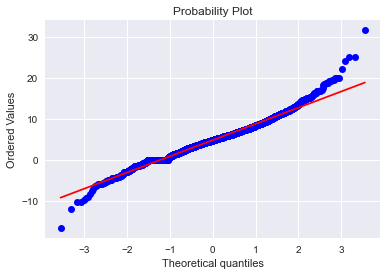

In [10]:
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(dfR['Average feeling'], dist="norm", plot=pylab)
pylab.show()

<li>Removing ratings above 10</li>
<li>Removing negative rating</li>

In [11]:
#dfR2 = dfR[(dfR['Average feeling']>=-10) & (dfR['Average feeling']<=20)]
dfR2 = dfR[(dfR['Average feeling']<=20)]
dfR2.describe()

,Positivity,Negativity,Average feeling
count,3595.000000,3595.000000,3595.000000
mean,6.062206,1.335526,4.726680
std,3.288052,1.480740,3.920313
min,0.000000,0.000000,-16.666667
25%,4.166667,0.000000,2.210304
50%,6.004141,1.091016,4.735351
75%,7.843137,1.941748,7.001094
max,22.222222,16.666667,20.000000


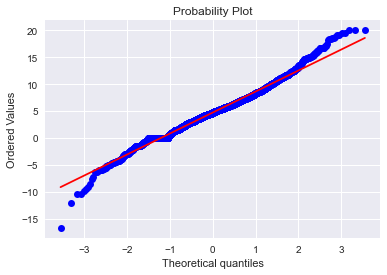

In [12]:
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(dfR2['Average feeling'], dist="norm", plot=pylab)
pylab.show()

<h4>Translating rating into hotel ratings</h4>

In [13]:
def ClassifyHotel(rating):
    if rating <= float(-10) :
        return int(0)
    elif ((rating > float(-10)) & (rating <=float(-4))):
        return int(1)
    elif ((rating > float(-4)) & (rating <=float(2))):
        return int(2)
    elif ((rating > float(2)) & (rating <=float(8))):
        return int(3)
    elif ((rating > float(8)) & (rating <=float(14))):
        return int(4)
    elif ((rating > float(14)) & (rating <=float(20))):
        return int(5)

In [14]:
dfR2['Hotel Rating'] = dfR2['Average feeling'].apply(ClassifyHotel)

In [15]:
dfR2

,Positivity,Negativity,Average feeling,Hotel Rating
Hotels,,,,
Hotel Russo Palace,3.961353,1.062802,2.898551,3
Americas Best Value Inn,4.484852,2.959886,1.524966,2
Intermezzo,0.000000,0.000000,0.000000,2
Studio 6,0.000000,0.000000,0.000000,2
Little Paradise Hotel,7.270487,0.369686,6.900801,3
...,...,...,...,...
Silver Sands Oceanfront Motel,9.375000,1.562500,7.812500,3
Sandy Neck Motel,9.589041,1.369863,8.219178,4
Shilo Inn Suites - Coeur d'Alene,8.510638,0.000000,8.510638,4


<h4>Comparison</h4>

In [16]:
dfR2.sort_values(by = 'Average feeling')

,Positivity,Negativity,Average feeling,Hotel Rating
Hotels,,,,
Advance Motel,0.000000,16.666667,-16.666667,0
Knights Inn Metairie,0.000000,12.000000,-12.000000,0
Royal Suite Lodge,0.000000,10.416667,-10.416667,0
Ramada Plaza Hawthorne/lax,1.470588,11.764706,-10.294118,0
Three Oaks Motel,0.000000,9.756098,-9.756098,1
...,...,...,...,...
Holiday Inn Express & Suites Helena,22.222222,2.777778,19.444444,5
Courtyard Las Vegas Henderson/Green Valley,19.512195,0.000000,19.512195,5
City Center Motel,20.000000,0.000000,20.000000,5


In [17]:
dfR2.sort_values(by = 'Hotel Rating')

,Positivity,Negativity,Average feeling,Hotel Rating
Hotels,,,,
Royal Suite Lodge,0.000000,10.416667,-10.416667,0
Ramada Plaza Hawthorne/lax,1.470588,11.764706,-10.294118,0
Knights Inn Metairie,0.000000,12.000000,-12.000000,0
Advance Motel,0.000000,16.666667,-16.666667,0
Motel 6-dubuque,1.408451,5.633803,-4.225352,1
...,...,...,...,...
Hampton Inn & Suites Rosemont Chicago O'hare,14.634146,0.000000,14.634146,5
BEST WESTERN PLUS Greentree Inn & Suites,15.384615,0.000000,15.384615,5
Hampton Inn Orange City,16.393443,1.639344,14.754098,5


# NRC Analysis

In [18]:
def get_nrc_data():
    nrc = r"C:\Users\mkiangi\Downloads\IEOR 4325 Data Analytics\Session 17 - 20 - Text Mining\data\NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [19]:
emotion_dict =get_nrc_data()

In [20]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    text = str(text)
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y} # what is happening here
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        #print(word)
        if emotion_dict.get(word):
            #print(emotion_dict.get(word))
            for emotion in emotion_dict.get(word):
                #print(emotion)
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [21]:
def comparative_emotion_analyzer(hotels,object_name="Hotel Reviews",print_output=False):
    
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Hotel name', 'username','fear','trust','negative',
                           'positive','anger','joy','disgust','anticipation',
                           'sadness','surprise'],)
    df.set_index(object_name,inplace=True)
    
    results = hotels['text'].apply(emotion_analyzer).apply(pd.Series)
    
    df = pd.concat([hotels,results],axis = 1)
        
    return df

In [22]:
# results = df['text'].apply(emotion_analyzer).apply(pd.Series)

In [23]:
#dfr = pd.concat([df,results],axis = 1)

<h3>Running analysis on each review</h3>

In [24]:
dfR = comparative_emotion_analyzer(df)

In [25]:
dfR['All positive'] = dfR['trust']+dfR['positive']+dfR['joy']+ dfR['anticipation']+dfR['surprise']
dfR['All negative'] = dfR['fear']+dfR['negative']+dfR['anger']+ dfR['disgust']+dfR['sadness']
dfR['Average feeling'] = dfR['All positive'] - dfR['All negative']

In [26]:
dfR

,address,categories,city,country,latitude,longitude,name,postalCode,province,date,...,sadness,disgust,anticipation,trust,joy,fear,anger,All positive,All negative,Average feeling
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,0.000000,0.030303,0.030303,0.030303,0.030303,0.000,0.030303,0.212121,0.090909,0.121212
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,0.022727,0.000000,0.068182,0.090909,0.068182,0.000,0.000000,0.431818,0.022727,0.409091
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.035714,0.000000,0.035714
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,0.000000,0.000000,0.033898,0.050847,0.050847,0.000,0.000000,0.220339,0.000000,0.220339
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,0.000000,0.000000,0.033898,0.050847,0.050847,0.000,0.000000,0.220339,0.000000,0.220339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Rockaway Beach,US,45.611260,-123.945560,Silver Sands Oceanfront Motel,97136-9596,OR,2016-03-13T00:00:00Z,...,0.000000,0.000000,0.016393,0.032787,0.032787,0.000,0.000000,0.131148,0.000000,0.131148
9996,669 Route 6a,"Hotel,Hotels",East Sandwich,US,41.729390,-70.399250,Sandy Neck Motel,02537-1472,MA,2015-12-11T00:00:00Z,...,0.000000,0.016393,0.032787,0.016393,0.032787,0.000,0.016393,0.147541,0.049180,0.098361
9997,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Coeur d'Alene,US,47.699930,-116.796900,Shilo Inn Suites - Coeur d'Alene,83814-9338,ID,2017-11-17T00:00:00.000Z,...,0.022727,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.045455,0.022727,0.022727
9998,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Jackson,US,35.666390,-88.830120,Scottish Inn,38305-4922,TN,2016-06-09T00:00:00Z,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.016393,-0.016393


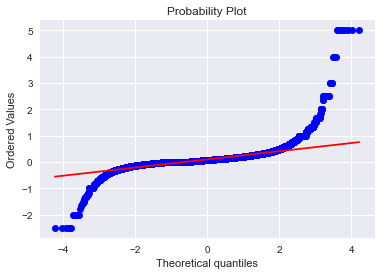

In [27]:
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(dfR['Average feeling'], dist="norm", plot=pylab)
pylab.show()

<h3>Running analysis on each hotel</h3>

In [28]:
dfH = pd.DataFrame(list(reviews.items()), columns= ['name','text'])
dfH

,name,text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Americas Best Value Inn,to share your opinion of this businesswith YP ...
2,Intermezzo,to share your opinion of this businesswith YP ...
3,Studio 6,to share your opinion of this businesswith YP ...
4,Little Paradise Hotel,"We had a wonderful, relaxing time. The staff w..."
...,...,...
3595,Silver Sands Oceanfront Motel,Small town on the state route - unexpected del...
3596,Sandy Neck Motel,"I live close by, and needed to stay somewhere ..."
3597,Shilo Inn Suites - Coeur d'Alene,Rolled in 11:30 laid out heads down woke up to...
3598,Scottish Inn,Absolutely terrible..I was told I was being gi...


In [29]:
dfR = comparative_emotion_analyzer(dfH)

In [30]:
dfR['All positive'] = dfR['trust']+dfR['positive']+dfR['joy']+ dfR['anticipation']+dfR['surprise']
dfR['All negative'] = dfR['fear']+dfR['negative']+dfR['anger']+ dfR['disgust']+dfR['sadness']
dfR['Average feeling'] = dfR['All positive'] - dfR['All negative']

In [31]:
dfR

,name,text,negative,positive,surprise,sadness,disgust,anticipation,trust,joy,fear,anger,All positive,All negative,Average feeling
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,0.013372,0.036140,0.008674,0.007228,0.002530,0.014817,0.017709,0.018793,0.009758,0.002530,0.096133,0.035417,0.060716
1,Americas Best Value Inn,to share your opinion of this businesswith YP ...,0.021456,0.033591,0.007523,0.010565,0.008929,0.015830,0.021391,0.016550,0.008013,0.009256,0.094885,0.058219,0.036665
2,Intermezzo,to share your opinion of this businesswith YP ...,0.000000,0.062500,0.000000,0.000000,0.000000,0.125000,0.062500,0.062500,0.000000,0.000000,0.312500,0.000000,0.312500
3,Studio 6,to share your opinion of this businesswith YP ...,0.000000,0.065217,0.000000,0.000000,0.000000,0.086957,0.065217,0.065217,0.000000,0.000000,0.282609,0.000000,0.282609
4,Little Paradise Hotel,"We had a wonderful, relaxing time. The staff w...",0.004923,0.054852,0.016174,0.009142,0.000000,0.018987,0.023207,0.023207,0.000703,0.000000,0.136428,0.014768,0.121660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Silver Sands Oceanfront Motel,Small town on the state route - unexpected del...,0.009174,0.064220,0.027523,0.000000,0.000000,0.036697,0.036697,0.064220,0.009174,0.009174,0.229358,0.027523,0.201835
3596,Sandy Neck Motel,"I live close by, and needed to stay somewhere ...",0.016393,0.032787,0.032787,0.000000,0.016393,0.032787,0.016393,0.032787,0.000000,0.016393,0.147541,0.049180,0.098361
3597,Shilo Inn Suites - Coeur d'Alene,Rolled in 11:30 laid out heads down woke up to...,0.000000,0.045455,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.022727,0.022727
3598,Scottish Inn,Absolutely terrible..I was told I was being gi...,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,-0.016393


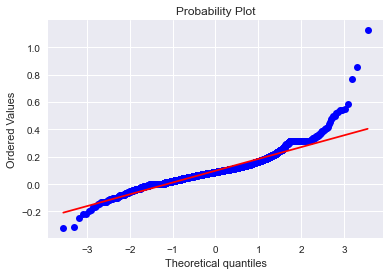

In [32]:
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(dfR['Average feeling'], dist="norm", plot=pylab)
pylab.show()

<h3>Clean up...</h3>

In [33]:
dfR = dfR[dfR['Average feeling']<=0.6]
dfR = dfR[dfR['Average feeling']>=-0.30]

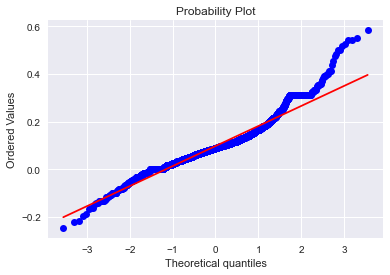

In [34]:
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(dfR['Average feeling'], dist="norm", plot=pylab)
pylab.show()

<h3>Multiclass Classification</h3>

In [35]:
def ClassifyHotel(rating):
    if rating <= float(-0.28) :
        return int(0)
    elif ((rating > float(-0.28)) & (rating <=float(-0.10733))):
        return int(1)
    elif ((rating > float(-0.10733)) & (rating <=float(0.065333))):
        return int(2)
    elif ((rating > float(0.065333)) & (rating <=float(0.238))):
        return int(3)
    elif ((rating > float(0.238)) & (rating <=float(0.410666))):
        return int(4)
    elif ((rating > float(0.410666)) & (rating <=float(0.583334))):
        return int(5)

In [36]:
dfR['Hotel Rating'] = dfR['Average feeling'].apply(ClassifyHotel)

In [37]:
dfR

,name,text,negative,positive,surprise,sadness,disgust,anticipation,trust,joy,fear,anger,All positive,All negative,Average feeling,Hotel Rating
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,0.013372,0.036140,0.008674,0.007228,0.002530,0.014817,0.017709,0.018793,0.009758,0.002530,0.096133,0.035417,0.060716,2
1,Americas Best Value Inn,to share your opinion of this businesswith YP ...,0.021456,0.033591,0.007523,0.010565,0.008929,0.015830,0.021391,0.016550,0.008013,0.009256,0.094885,0.058219,0.036665,2
2,Intermezzo,to share your opinion of this businesswith YP ...,0.000000,0.062500,0.000000,0.000000,0.000000,0.125000,0.062500,0.062500,0.000000,0.000000,0.312500,0.000000,0.312500,4
3,Studio 6,to share your opinion of this businesswith YP ...,0.000000,0.065217,0.000000,0.000000,0.000000,0.086957,0.065217,0.065217,0.000000,0.000000,0.282609,0.000000,0.282609,4
4,Little Paradise Hotel,"We had a wonderful, relaxing time. The staff w...",0.004923,0.054852,0.016174,0.009142,0.000000,0.018987,0.023207,0.023207,0.000703,0.000000,0.136428,0.014768,0.121660,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Silver Sands Oceanfront Motel,Small town on the state route - unexpected del...,0.009174,0.064220,0.027523,0.000000,0.000000,0.036697,0.036697,0.064220,0.009174,0.009174,0.229358,0.027523,0.201835,3
3596,Sandy Neck Motel,"I live close by, and needed to stay somewhere ...",0.016393,0.032787,0.032787,0.000000,0.016393,0.032787,0.016393,0.032787,0.000000,0.016393,0.147541,0.049180,0.098361,3
3597,Shilo Inn Suites - Coeur d'Alene,Rolled in 11:30 laid out heads down woke up to...,0.000000,0.045455,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.022727,0.022727,2
3598,Scottish Inn,Absolutely terrible..I was told I was being gi...,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,-0.016393,2


<h3>Binary Classification</h3>

In [38]:
def ClassifyHotel(rating):
    if rating <= float(0) :
        return int(0)
    else:
        return int(1)

In [39]:
dfR['Hotel Rating'] = dfR['Average feeling'].apply(ClassifyHotel)

In [40]:
dfR

,name,text,negative,positive,surprise,sadness,disgust,anticipation,trust,joy,fear,anger,All positive,All negative,Average feeling,Hotel Rating
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,0.013372,0.036140,0.008674,0.007228,0.002530,0.014817,0.017709,0.018793,0.009758,0.002530,0.096133,0.035417,0.060716,1
1,Americas Best Value Inn,to share your opinion of this businesswith YP ...,0.021456,0.033591,0.007523,0.010565,0.008929,0.015830,0.021391,0.016550,0.008013,0.009256,0.094885,0.058219,0.036665,1
2,Intermezzo,to share your opinion of this businesswith YP ...,0.000000,0.062500,0.000000,0.000000,0.000000,0.125000,0.062500,0.062500,0.000000,0.000000,0.312500,0.000000,0.312500,1
3,Studio 6,to share your opinion of this businesswith YP ...,0.000000,0.065217,0.000000,0.000000,0.000000,0.086957,0.065217,0.065217,0.000000,0.000000,0.282609,0.000000,0.282609,1
4,Little Paradise Hotel,"We had a wonderful, relaxing time. The staff w...",0.004923,0.054852,0.016174,0.009142,0.000000,0.018987,0.023207,0.023207,0.000703,0.000000,0.136428,0.014768,0.121660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Silver Sands Oceanfront Motel,Small town on the state route - unexpected del...,0.009174,0.064220,0.027523,0.000000,0.000000,0.036697,0.036697,0.064220,0.009174,0.009174,0.229358,0.027523,0.201835,1
3596,Sandy Neck Motel,"I live close by, and needed to stay somewhere ...",0.016393,0.032787,0.032787,0.000000,0.016393,0.032787,0.016393,0.032787,0.000000,0.016393,0.147541,0.049180,0.098361,1
3597,Shilo Inn Suites - Coeur d'Alene,Rolled in 11:30 laid out heads down woke up to...,0.000000,0.045455,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.022727,0.022727,1
3598,Scottish Inn,Absolutely terrible..I was told I was being gi...,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,-0.016393,0
